In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("/home/abishek-murugan/GUVI/GUVI Projects/diamond-price-prediction/data/diamonds.csv")

In [2]:
print(df.shape)
df.head()

(53940, 10)


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
df[['x','y','z']] = df[['x','y','z']].replace(0, np.nan)
df.dropna(inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53920 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53920 non-null  float64
 1   cut      53920 non-null  object 
 2   color    53920 non-null  object 
 3   clarity  53920 non-null  object 
 4   depth    53920 non-null  float64
 5   table    53920 non-null  float64
 6   price    53920 non-null  int64  
 7   x        53920 non-null  float64
 8   y        53920 non-null  float64
 9   z        53920 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.5+ MB


In [4]:
USD_TO_INR = 83 

df['price_inr'] = df['price'] * USD_TO_INR
df['volume'] = df['x'] * df['y'] * df['z']
df['price_per_carat'] = df['price'] / df['carat']
df['dimension_ratio'] = (df['x'] + df['y']) / (2 * df['z'])

df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,price_inr,volume,price_per_carat,dimension_ratio
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,27058,38.202030,1417.391304,1.631687
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,27058,34.505856,1552.380952,1.673160
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,27141,38.076885,1421.739130,1.757576
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,27722,46.724580,1151.724138,1.602662
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,27805,51.917250,1080.645161,1.580000


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

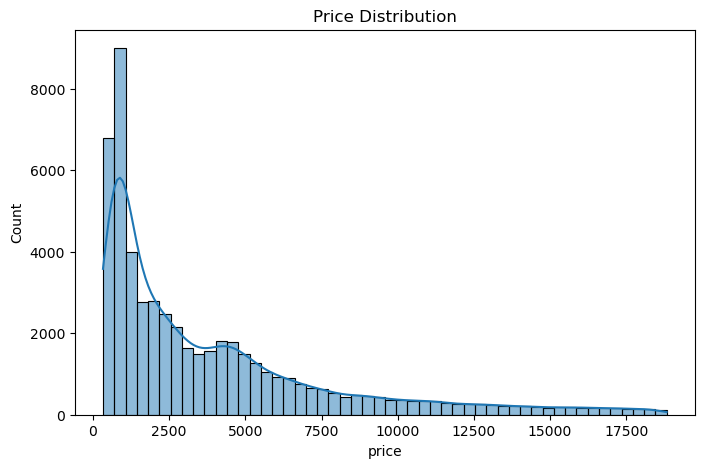

In [6]:
plt.figure(figsize=(8,5))
sns.histplot(df["price"], bins=50, kde=True)
plt.title("Price Distribution")
plt.show()

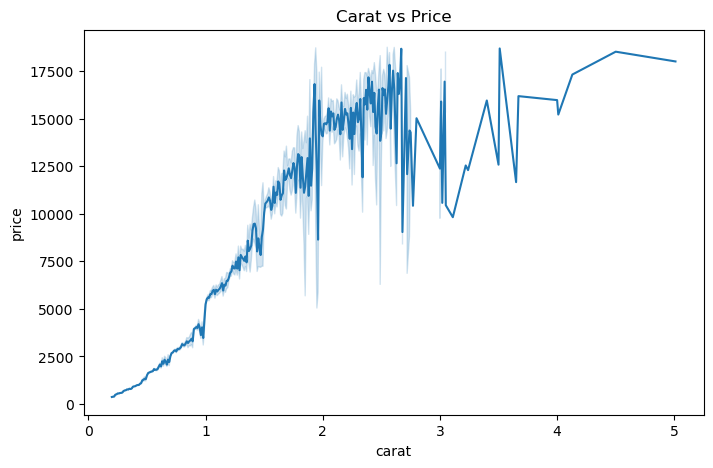

In [7]:
plt.figure(figsize=(8,5))
sns.lineplot(x="carat", y="price", data=df)
plt.title("Carat vs Price")
plt.show()

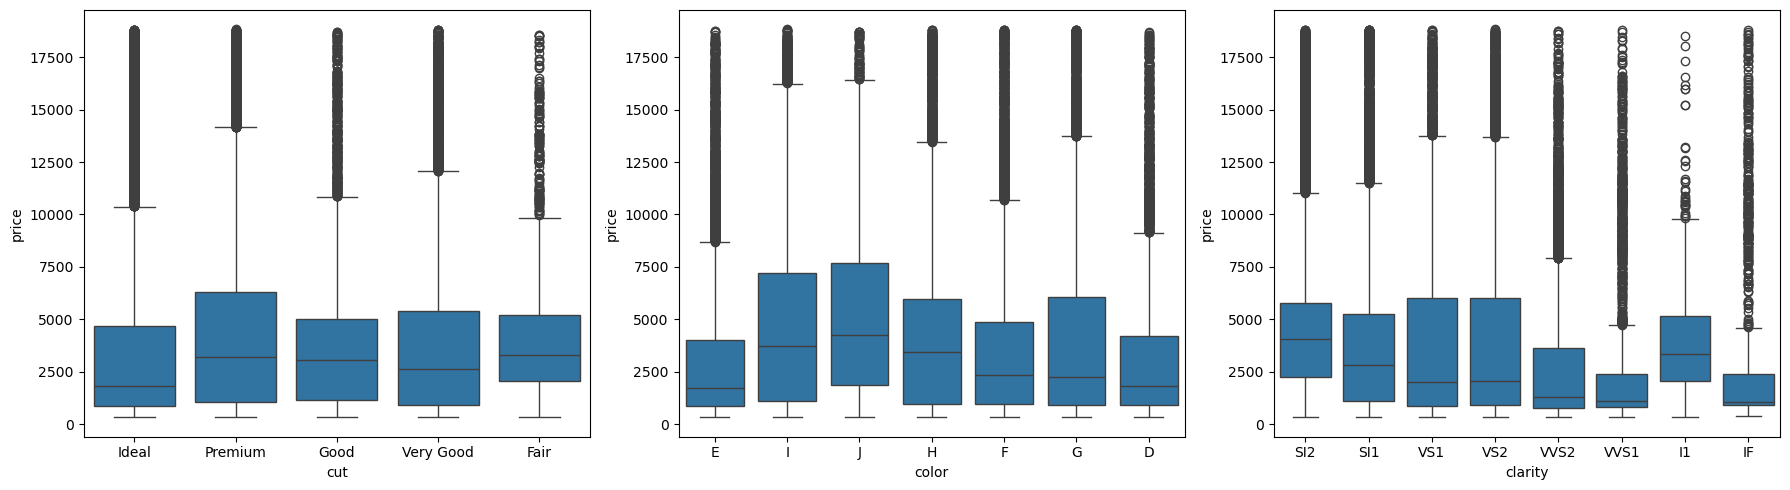

In [8]:
fig, axes = plt.subplots(1, 3, figsize=(18,5))

sns.boxplot(x="cut", y="price", data=df, ax=axes[0])
sns.boxplot(x="color", y="price", data=df, ax=axes[1])
sns.boxplot(x="clarity", y="price", data=df, ax=axes[2])

plt.tight_layout()
plt.show()

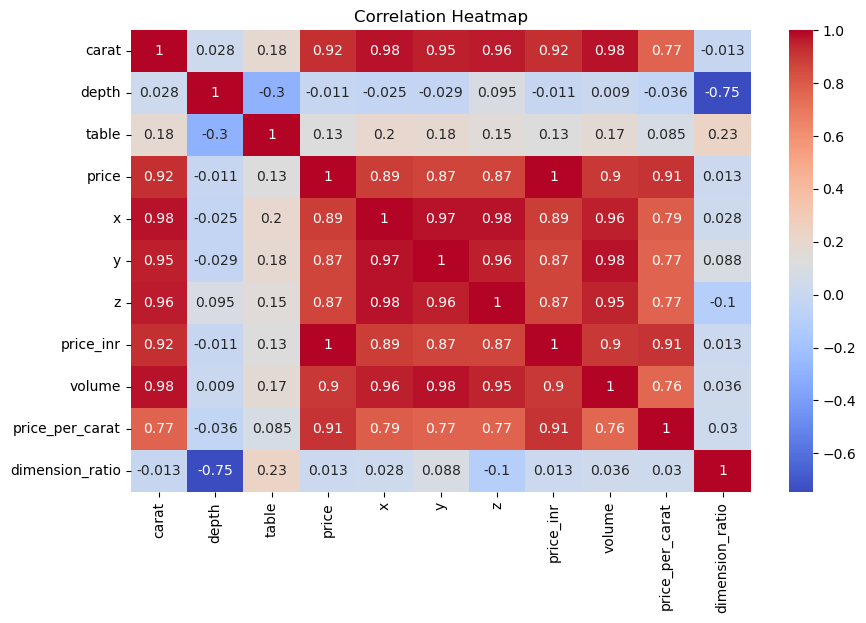

In [9]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [10]:
df[['price_inr','carat','x','y','z']].skew()

price_inr    1.618349
carat        1.116207
x            0.398348
y            2.462211
z            1.585490
dtype: float64

In [11]:
df['log_price_inr'] = np.log1p(df['price_inr'])
df['log_carat'] = np.log1p(df['carat'])
df['log_volume'] = np.log1p(df['volume'])

In [12]:
df[['price_inr','carat','x','y','z']].skew()

price_inr    1.618349
carat        1.116207
x            0.398348
y            2.462211
z            1.585490
dtype: float64

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [14]:
X = df.drop(columns=['price', 'price_inr'])
y = df['price_inr']

categorical_cols = ['cut','color','clarity']
numerical_cols = X.drop(columns=categorical_cols).columns

ordinal_encoder = OrdinalEncoder()

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', ordinal_encoder, categorical_cols),
        ('num', StandardScaler(), numerical_cols)
    ]
)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

In [17]:
lr = Pipeline([
    ('preprocess', preprocessor),
    ('model', LinearRegression())
])

lr.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat', OrdinalEncoder(),
                                                  ['cut', 'color', 'clarity']),
                                                 ('num', StandardScaler(),
                                                  Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'volume', 'price_per_carat',
       'dimension_ratio', 'log_price_inr', 'log_carat', 'log_volume'],
      dtype='object'))])),
                ('model', LinearRegression())])

In [18]:
dt = Pipeline([
    ('preprocess', preprocessor),
    ('model', DecisionTreeRegressor(max_depth=10))
])

dt.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat', OrdinalEncoder(),
                                                  ['cut', 'color', 'clarity']),
                                                 ('num', StandardScaler(),
                                                  Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'volume', 'price_per_carat',
       'dimension_ratio', 'log_price_inr', 'log_carat', 'log_volume'],
      dtype='object'))])),
                ('model', DecisionTreeRegressor(max_depth=10))])

In [19]:
rf = Pipeline([
    ('preprocess', preprocessor),
    ('model', RandomForestRegressor(n_estimators=100, random_state=42))
])

rf.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat', OrdinalEncoder(),
                                                  ['cut', 'color', 'clarity']),
                                                 ('num', StandardScaler(),
                                                  Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'volume', 'price_per_carat',
       'dimension_ratio', 'log_price_inr', 'log_carat', 'log_volume'],
      dtype='object'))])),
                ('model', RandomForestRegressor(random_state=42))])

In [20]:
knn = Pipeline([
    ('preprocess', preprocessor),
    ('model', KNeighborsRegressor(n_neighbors=7))
])

knn.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat', OrdinalEncoder(),
                                                  ['cut', 'color', 'clarity']),
                                                 ('num', StandardScaler(),
                                                  Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'volume', 'price_per_carat',
       'dimension_ratio', 'log_price_inr', 'log_carat', 'log_volume'],
      dtype='object'))])),
                ('model', KNeighborsRegressor(n_neighbors=7))])

In [21]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import joblib

In [22]:
def evaluate(model, name):
    preds = model.predict(X_test)
    
    mae = mean_absolute_error(y_test, preds)
    mse = mean_squared_error(y_test, preds)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, preds)
    
    print(name)
    print("MAE :", mae)
    print("RMSE:", rmse)
    print("R2  :", r2)
    print("-" * 40)

evaluate(lr, "Linear Regression")
evaluate(dt, "Decision Tree")
evaluate(rf, "Random Forest")
evaluate(knn, "KNN")

Linear Regression
MAE : 19177.89601313807
RMSE: 91867.02660037727
R2  : 0.9235853264326028
----------------------------------------
Decision Tree
MAE : 261.898279891195
RMSE: 342.14144911304555
R2  : 0.9999989400904067
----------------------------------------
Random Forest
MAE : 24.238324369435475
RMSE: 68.70175830099122
R2  : 0.9999999572640713
----------------------------------------
KNN
MAE : 18893.989905680373
RMSE: 34709.772697340966
R2  : 0.9890916018433241
----------------------------------------


In [23]:
joblib.dump(rf, "/home/abishek-murugan/GUVI/GUVI Projects/diamond-price-prediction/best_diamond_price_model.pkl")

['/home/abishek-murugan/GUVI/GUVI Projects/diamond-price-prediction/best_diamond_price_model.pkl']

In [24]:
cluster_df = df.drop(columns=['price','price_inr'])
cluster_df[categorical_cols] = ordinal_encoder.fit_transform(cluster_df[categorical_cols])

scaler = StandardScaler()
scaled_data = scaler.fit_transform(cluster_df)

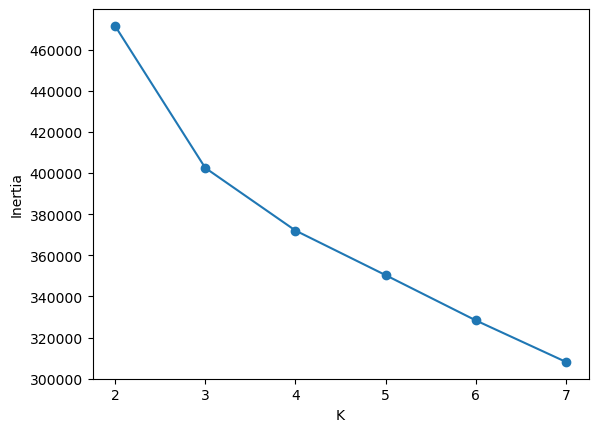

In [25]:
inertia = []
for k in range(2,8):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(scaled_data)
    inertia.append(km.inertia_)

plt.plot(range(2,8), inertia, marker='o')
plt.xlabel("K")
plt.ylabel("Inertia")
plt.show()

In [26]:
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

df['cluster'] = clusters

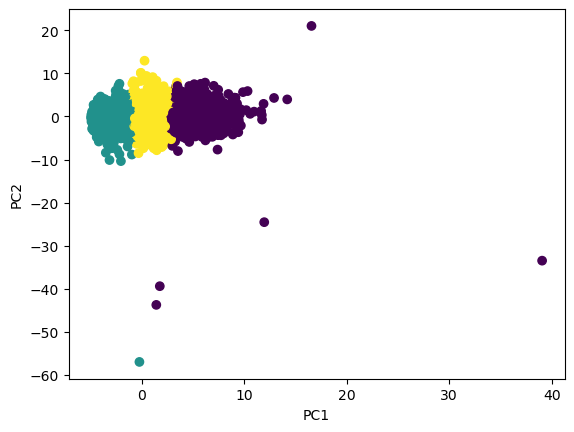

In [27]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

plt.scatter(pca_data[:,0], pca_data[:,1], c=clusters)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

In [28]:
df.groupby('cluster')[['carat','price_inr']].mean()

,carat,price_inr
cluster,,
0,1.650447,957156.425797
1,0.400156,86882.783347
2,0.934578,362840.021187


In [29]:
cluster_names = {
    0: "Affordable Small Diamonds",
    1: "Mid-range Balanced Diamonds",
    2: "Premium Heavy Diamonds"
}

df['cluster_name'] = df['cluster'].map(cluster_names)

In [31]:
joblib.dump(kmeans, "/home/abishek-murugan/GUVI/GUVI Projects/diamond-price-prediction/diamond_cluster_model.pkl")
joblib.dump(scaler, "/home/abishek-murugan/GUVI/GUVI Projects/diamond-price-prediction/scaler.pkl")

['/home/abishek-murugan/GUVI/GUVI Projects/diamond-price-prediction/scaler.pkl']

In [32]:
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

2026-02-01 03:50:25.631278: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2026-02-01 03:50:27.074077: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2026-02-01 03:50:31.626157: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.


In [33]:
X_ann = preprocessor.fit_transform(X)
y_ann = df['price_inr'].values

X_train_ann, X_test_ann, y_train_ann, y_test_ann = train_test_split(
    X_ann, y_ann, test_size=0.2, random_state=42
)

In [34]:
ann = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_ann.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)
])

ann.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mae']
)

/home/abishek-murugan/anaconda3/lib/python3.13/site-packages/keras/src/layers/core/dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2026-02-01 03:50:34.605687: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [35]:
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

history = ann.fit(
    X_train_ann, y_train_ann,
    validation_split=0.2,
    epochs=50,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/50
1079/1079 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 71172751360.0000 - mae: 152042.0312 - val_loss: 11100616704.0000 - val_mae: 62500.7031
Epoch 2/50
1079/1079 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 5704230912.0000 - mae: 50556.5664 - val_loss: 6661401600.0000 - val_mae: 43525.5469
Epoch 3/50
1079/1079 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 2768479744.0000 - mae: 36533.0078 - val_loss: 4797428224.0000 - val_mae: 31878.2129
Epoch 4/50
1079/1079 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 1548937216.0000 - mae: 26809.5762 - val_loss: 3842092288.0000 - val_mae: 23889.3711
Epoch 5/50
1079/1079 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - loss: 1018192384.0000 - mae: 20483.3340 - val_loss: 3239476736.0000 - val_mae: 19069.0586
Epoch 6/50
1079/1079 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - loss: 779661568.0000 - mae: 15990.5752 - val_loss: 2962052864.0000 - val_mae: 15027.3857
Epoch 7/50
1079/1079 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - loss: 653323328.0000 - mae: 12702.9922 - val_loss: 2740557568.0000

In [36]:
ann_preds = ann.predict(X_test_ann).flatten()

mae = mean_absolute_error(y_test_ann, ann_preds)
rmse = np.sqrt(mean_squared_error(y_test_ann, ann_preds))
r2 = r2_score(y_test_ann, ann_preds)

print("ANN Results")
print("MAE :", mae)
print("RMSE:", rmse)
print("R2  :", r2)

337/337 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
ANN Results
MAE : 2101.6005859375
RMSE: 12219.331569279884
R2  : 0.9986480474472046


In [ ]:
ann.save("/home/abishek-murugan/GUVI/GUVI Projects/diamond-price-prediction/diamond_price_ann_model.h5")